In [26]:
# =============================================================
# Copyright © 2022 Intel Corporation
# 
# SPDX-License-Identifier: MIT
# =============================================================

# XGBoost Getting Started Example on Linear Regression
## Importing and Organizing Data
In this example we will be predicting prices of houses in California based on the features of each house using Intel optimizations for XGBoost shipped as a part of the oneAPI AI Analytics Toolkit.
Let's start by **importing** all necessary data and packages.

In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Now let's **load** in the dataset and **organize** it as necessary to work with our model.

In [2]:
#loading the data
california = fetch_california_housing()

#converting data into a pandas dataframe
data = pd.DataFrame(california.data)
data.columns = california.feature_names

#setting price as value to be predicted
data['PRICE'] = california.target

#extracting rows
X, y = data.iloc[:,:-1],data.iloc[:,-1]

#using dmatrix values for xgboost
data_dmatrix = xgb.DMatrix(data=X,label=y)

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1693)



/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


**Instantiate and define XGBoost regresion object** by calling the XGBRegressor() class from the library. Use hyperparameters to define the object. Intel optimizations for XGBoost trainingcan be used by calling the `hist` tree method in the parameters, as shown below.

In [3]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10, tree_method='hist')

## Training and Saving the model

**Fitting and training model** using training datasets and predicting values. Note that Intel optimizations for XGBoost inference are enabled by default. 

In [9]:
xg_reg.fit(X_train,y_train)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='hist', validate_parameters=1, verbosity=None)

In [10]:
preds = xg_reg.predict(X_test)
time = %timeit -r10 -o xg_reg.predict(X_test)
time = time.average

1.31 ms ± 1.28 µs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)


In [6]:
import daal4py as d4p

In [7]:
daal_model = d4p.get_gbt_model_from_xgboost(xg_reg.get_booster())

In [8]:
daal_prediction = d4p.gbt_regression_prediction().compute(X_test, daal_model).prediction
time_daal = %timeit -r10 -o d4p.gbt_regression_prediction().compute(X_test, daal_model).prediction
time_daal = time_daal.average

205 µs ± 140 ns per loop (mean ± std. dev. of 10 runs, 10,000 loops each)


**Finding root mean squared error** of predicted values.

In [14]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE:",rmse)

RMSE: 1.0823382872176526


In [15]:
rmse = np.sqrt(mean_squared_error(y_test, daal_prediction))
print("RMSE:",rmse)

RMSE: 1.082338291405647


### Visualizations

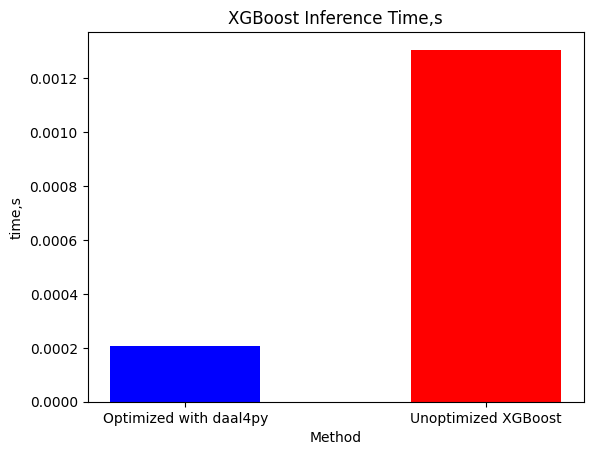

Performance Speedup:  6.367654831187184


In [12]:
import matplotlib.pyplot as plt
left = [1,2]
pred_times = [time_daal, time]
tick_label = ['Optimized with daal4py', 'Unoptimized XGBoost']
plt.bar(left, pred_times, tick_label = tick_label, width = 0.5, color = ['blue', 'red'])
plt.xlabel('Method'); plt.ylabel('time,s'); plt.title('XGBoost Inference Time,s')
plt.show()
print("Performance Speedup: ",(time)/(time_daal))

 ##Saving the Results

Now let's **export the predicted values to a CSV file**.

In [13]:
pd.DataFrame(preds).to_csv('foo.csv',index=False)

In [14]:
print("[CODE_SAMPLE_COMPLETED_SUCCESFULLY]")

[CODE_SAMPLE_COMPLETED_SUCCESFULLY]
